In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('hw06_data1.csv')
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [4]:
data.dtypes

WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

In [5]:
data.shape

(1000, 11)

### Standardize the Data

In [6]:
# splitting the data into X and y
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [7]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784987],
       ...,
       [ 0.64177715, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602454, -0.85567   ],
       [-0.38765353, -0.59589427, -1.43139809, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Modelling

In [9]:
# training the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [10]:
# Evaluating the model

y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[150   9]
 [ 10 131]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.94      0.93      0.93       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [11]:
# Choosing the K value
# use the elbow method to choose the best K value 10 K-fold cross validation

from sklearn.model_selection import cross_val_score

accuracy_rate = []

# The following code will take some time
for i in range(1,40):   
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())


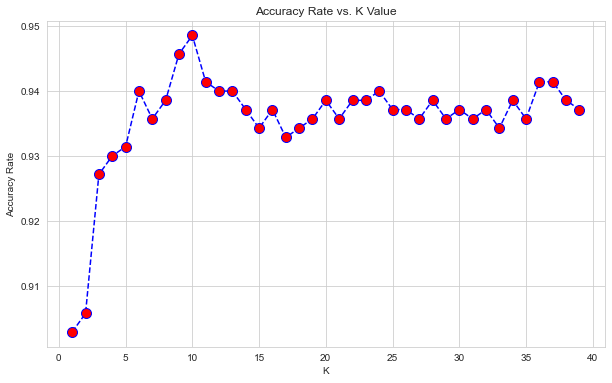

In [12]:
# visualize 
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
            markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

<p>The best range of value is 7-10 because the accuracy rate is the highest in this range</p>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import *

In [14]:
# loading the text dataset
data_text = pd.read_csv('hw06_data2.txt', sep='\t', names=['Label', 'text'])
data_text.head()

,Label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data_text.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

<AxesSubplot:>

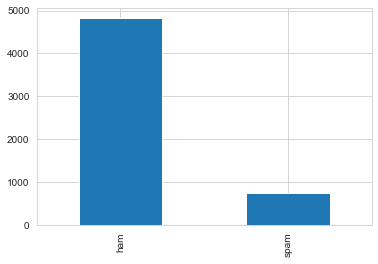

In [16]:
data_text.Label.value_counts().plot(kind='bar')

In [17]:
# splitting the data into X and y
#X = data_text.drop('Label', axis=1)
#y = data_text['Label']

In [22]:
# splitting the data into X and y using iloc method 
X2 = data_text.iloc[:, 1].values
y2 = data_text.iloc[:, 0].values

In [23]:
print(X2.shape)
print(y2.shape)

(5572,)
(5572,)


In [24]:
# splitting the data into training and testing data
X_train_text , X_test_text , y_train_text , y_test_text = train_test_split(X2, y2, test_size=0.2, random_state=101)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Creating a model based on Multinomial Naïve Bayes
# pipeline is used to control the workflow
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training the model with train data
model.fit(X_train_text, y_train_text)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [33]:
# Creating labels for the test data
labels = model.predict(X_test_text)

# evaluating the model
print("[[TN, FP]\n[FN, TP]]\n")

print(confusion_matrix(y_test_text, labels))

print(classification_report(y_test_text, labels))

[[TN, FP]
[FN, TP]]

[[980   0]
 [ 50  85]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       980
        spam       1.00      0.63      0.77       135

    accuracy                           0.96      1115
   macro avg       0.98      0.81      0.87      1115
weighted avg       0.96      0.96      0.95      1115



## Analsing the results

<ol>
<li>The model has a precision of 0.95 for ham and 1.00 for spam this means that the model is very good at predicting ham and spam</li>
<li>The model has a recall of 1.00 for ham and 0.63 for spam this means that the model is very good at predicting ham but not spam</li>
<li>The model has a f1-score of 0.98 for ham and 0.77 for spam this means that the model is very good at predicting ham but not spam</li>
<li>The model has a support of 980 for ham and 135 for spam this means that the model has a lot of ham and not a lot of spam also there is class imbalance in the data</li></ol>